### Purpose of this notebook is to create a dataframe with all of the Asgard proteins and predicted Transmembrane Regions with orthogroup annotations. Then, we will look at the annotations!

In [1]:
import pandas as pd
predicted_TMRs = '/project/dbarth/asgard/binsandTMRs.txt'
annotation_filepath = '/project/dbarth/asgard/Guaymas_proteomics_D4994_C39_H1_KA/ortholog_mapping_Guaymas/D4994_C39_H1_allbins.diamond.emapper.annotations.emapper.annotations'
pred_top_filepath = '/project/dbarth/asgard/Guaymas_proteomics_D4994_C39_H1_KA/asgard_biolib_results/predicted_topologies.3line'
genomes_annotation = '/project/dbarth/asgard/Guaymas_proteomics_D4994_C39_H1_KA/Guaymas_DB_D4994_C39_H1_KA.txt'

Read in dataframe of all the output from DeepTMHMM (run on the Asgard proteins)

In [12]:
tmrs_df = pd.read_csv(predicted_TMRs, delimiter=' ', header=None)
tmrs_df.shape

(50979, 7)

In [13]:
#! head '/project/dbarth/asgard/Guaymas_proteomics_D4994_C39_H1_KA/asgard_biolib_results/predicted_topologies.3line'


In [14]:
#Spruce up the TMRs dataframe and remove the rows that don't have any predicted TMRs
tmrs_df = tmrs_df.drop([0,2,3,4,5], axis=1).rename(columns={1:'ProteinID', 6:'Num_predicted_TMRs'})

,ProteinID,Num_predicted_TMRs
0,D4994_C39_H1_Bin_33_scaffold_101747_1,1
3,D4994_C39_H1_Bin_33_scaffold_102981_1,1
9,D4994_C39_H1_Bin_33_scaffold_102981_15,13
10,D4994_C39_H1_Bin_33_scaffold_102981_16,8
12,D4994_C39_H1_Bin_33_scaffold_102981_2,1


,ProteinID,Num_predicted_TMRs
0,D4994_C39_H1_Bin_33_scaffold_101747_1,1
3,D4994_C39_H1_Bin_33_scaffold_102981_1,1
9,D4994_C39_H1_Bin_33_scaffold_102981_15,13
10,D4994_C39_H1_Bin_33_scaffold_102981_16,8
12,D4994_C39_H1_Bin_33_scaffold_102981_2,1


In [6]:
#Function that takes in a 3line file and outputs a pandas dataframe containing the protein names, the corresponding AA sequence, and prediction from DeepTMHMM
def read3line(filepath):    
    protein_names = []
    sequence = []
    prediction = []
    with open(filepath, "r") as a_file:
        for line in a_file:
            if line.startswith('>'):
                split_line = line.split('>')#line.strip()
                split_line = split_line[1].split(' ')
                prot_name = split_line[0]
                protein_names.append(prot_name)
                for a in range(2):
                    if a == 0:
                        seq = next(a_file)
                        split = seq.split('\n')
                        sequence.append(split[0])
                    else: 
                        pred = next(a_file)
                        pred_split = pred.split('\n')
                        prediction.append(pred_split[0])
    df = pd.DataFrame(list(zip(protein_names, sequence, prediction)),
               columns =['ProteinID', 'aa_sequence', 'DeepTMHMM_prediction'])
    return df

In [15]:
dtm_df = read3line(pred_top_filepath)
dtm_df.head()

,ProteinID,aa_sequence,DeepTMHMM_prediction
0,D4994_C39_H1_Bin_33_scaffold_101747_1,MITRSRGNESRSFNRSTSPNSRSSSSSRSNLDSDSDSDSDSYSNDI...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
1,D4994_C39_H1_Bin_33_scaffold_101747_2,MEEYLIHKGPVSCWDEKTKGEVIALMYHKIIVTVEWYKKNPTNEEF...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
2,D4994_C39_H1_Bin_33_scaffold_101747_3,MKPQFFIGNNVYAMIKAFTKNNKTQGVLTVVPNTVRPDKICSGRFM...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
3,D4994_C39_H1_Bin_33_scaffold_102981_1,MKKNTFTVVTLSVLVLAVMIPMTFPGNDTRVEDQVAMQPDAPVTSY...,SSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOO...
4,D4994_C39_H1_Bin_33_scaffold_102981_10,MVEEEREDREEEEGEEGEEEEEGDNLGELVDGGITEDNLANVTGDD...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...


##### Create a new dataframe with the number of predicted TMRs, the peptide sequence, and the DeepTMHMM prediction

In [17]:
asgard_tmrs = tmrs_df.merge(dtm_df, on='ProteinID', how='outer')
print(asgard_tmrs.shape, dtm_df.shape)

(50979, 4) (50979, 3)


In [19]:
asgard_tmrs.head()

,ProteinID,Num_predicted_TMRs,aa_sequence,DeepTMHMM_prediction
0,D4994_C39_H1_Bin_33_scaffold_101747_1,1,MITRSRGNESRSFNRSTSPNSRSSSSSRSNLDSDSDSDSDSYSNDI...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
1,D4994_C39_H1_Bin_33_scaffold_101747_2,0,MEEYLIHKGPVSCWDEKTKGEVIALMYHKIIVTVEWYKKNPTNEEF...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
2,D4994_C39_H1_Bin_33_scaffold_101747_3,0,MKPQFFIGNNVYAMIKAFTKNNKTQGVLTVVPNTVRPDKICSGRFM...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
3,D4994_C39_H1_Bin_33_scaffold_102981_1,1,MKKNTFTVVTLSVLVLAVMIPMTFPGNDTRVEDQVAMQPDAPVTSY...,SSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOO...
4,D4994_C39_H1_Bin_33_scaffold_102981_10,0,MVEEEREDREEEEGEEGEEEEEGDNLGELVDGGITEDNLANVTGDD...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...


##### Merge the TMR info dataframe with the metagenomic information and orthogroup annotations

In [20]:
#Read in the metagenomes df with the Taxonomy
mags_annots = pd.read_csv(genomes_annotation, delimiter='\t')
#How many of the proks are not bacteria?
blarmfl = mags_annots[mags_annots['Taxonomy']!= 'Bacteria']
#How many are Asgard (ie not Archaea or Bacteria)?
sharmf = blarmfl[blarmfl['Taxonomy']!='Archaea']

print(mags_annots.shape, blarmfl.shape, sharmf.shape)

(822, 8) (186, 8) (16, 8)


In [21]:
#In order to join the metagenomic data onto the ProteinID from the asgard membrane proteins, need to 
#Create a new column in asgard_tmrs with the Bin of each protein
asgard_tmrs['Bin'] = asgard_tmrs['ProteinID'].str.split('_', 5).str[:5].str.join('_')
asgard_tmrs.head()

,ProteinID,Num_predicted_TMRs,aa_sequence,DeepTMHMM_prediction,Bin
0,D4994_C39_H1_Bin_33_scaffold_101747_1,1,MITRSRGNESRSFNRSTSPNSRSSSSSRSNLDSDSDSDSDSYSNDI...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33
1,D4994_C39_H1_Bin_33_scaffold_101747_2,0,MEEYLIHKGPVSCWDEKTKGEVIALMYHKIIVTVEWYKKNPTNEEF...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33
2,D4994_C39_H1_Bin_33_scaffold_101747_3,0,MKPQFFIGNNVYAMIKAFTKNNKTQGVLTVVPNTVRPDKICSGRFM...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33
3,D4994_C39_H1_Bin_33_scaffold_102981_1,1,MKKNTFTVVTLSVLVLAVMIPMTFPGNDTRVEDQVAMQPDAPVTSY...,SSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOO...,D4994_C39_H1_Bin_33
4,D4994_C39_H1_Bin_33_scaffold_102981_10,0,MVEEEREDREEEEGEEGEEEEEGDNLGELVDGGITEDNLANVTGDD...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33


In [22]:
#Merge the metagenomic annotations with the asgard transmembrane proteins
asgard_tmrs_annot = asgard_tmrs.merge(mags_annots, left_on='Bin', right_on='Genomes (Dive_Core_Horizon_Bin)',  how='left')

In [23]:
#Drop Genomes and Sample column from asgard_tmrs_annot
asgard_tmrs_annot = asgard_tmrs_annot.drop(['Genomes (Dive_Core_Horizon_Bin)', 'Sample (Dive_Core_Horizon)'], axis=1)
asgard_tmrs_annot.head()

,ProteinID,Num_predicted_TMRs,aa_sequence,DeepTMHMM_prediction,Bin,Taxonomy,CheckM Marker v1.1.3,CheckM Completeness v1.1.3,CheckM Contamination v1.1.3,GTDB-Tk v1.5.1 Classification,Value
0,D4994_C39_H1_Bin_33_scaffold_101747_1,1,MITRSRGNESRSFNRSTSPNSRSSSSSRSNLDSDSDSDSDSYSNDI...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33,Lokiarchaeota,k__Archaea (UID2),92.52,6.25,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,1
1,D4994_C39_H1_Bin_33_scaffold_101747_2,0,MEEYLIHKGPVSCWDEKTKGEVIALMYHKIIVTVEWYKKNPTNEEF...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33,Lokiarchaeota,k__Archaea (UID2),92.52,6.25,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,1
2,D4994_C39_H1_Bin_33_scaffold_101747_3,0,MKPQFFIGNNVYAMIKAFTKNNKTQGVLTVVPNTVRPDKICSGRFM...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33,Lokiarchaeota,k__Archaea (UID2),92.52,6.25,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,1
3,D4994_C39_H1_Bin_33_scaffold_102981_1,1,MKKNTFTVVTLSVLVLAVMIPMTFPGNDTRVEDQVAMQPDAPVTSY...,SSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOO...,D4994_C39_H1_Bin_33,Lokiarchaeota,k__Archaea (UID2),92.52,6.25,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,1
4,D4994_C39_H1_Bin_33_scaffold_102981_10,0,MVEEEREDREEEEGEEGEEEEEGDNLGELVDGGITEDNLANVTGDD...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33,Lokiarchaeota,k__Archaea (UID2),92.52,6.25,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,1


In [24]:
#Reorganize asgard_tmrs_annot so that the ProteinID is the first column then Bin and Taxonomy
asgard_tmrs_annot = asgard_tmrs_annot[['ProteinID', 'Bin', 'Taxonomy', 'Num_predicted_TMRs', 'aa_sequence', 'DeepTMHMM_prediction']]
asgard_tmrs_annot.head()

,ProteinID,Bin,Taxonomy,Num_predicted_TMRs,aa_sequence,DeepTMHMM_prediction
0,D4994_C39_H1_Bin_33_scaffold_101747_1,D4994_C39_H1_Bin_33,Lokiarchaeota,1,MITRSRGNESRSFNRSTSPNSRSSSSSRSNLDSDSDSDSDSYSNDI...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
1,D4994_C39_H1_Bin_33_scaffold_101747_2,D4994_C39_H1_Bin_33,Lokiarchaeota,0,MEEYLIHKGPVSCWDEKTKGEVIALMYHKIIVTVEWYKKNPTNEEF...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
2,D4994_C39_H1_Bin_33_scaffold_101747_3,D4994_C39_H1_Bin_33,Lokiarchaeota,0,MKPQFFIGNNVYAMIKAFTKNNKTQGVLTVVPNTVRPDKICSGRFM...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
3,D4994_C39_H1_Bin_33_scaffold_102981_1,D4994_C39_H1_Bin_33,Lokiarchaeota,1,MKKNTFTVVTLSVLVLAVMIPMTFPGNDTRVEDQVAMQPDAPVTSY...,SSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOO...
4,D4994_C39_H1_Bin_33_scaffold_102981_10,D4994_C39_H1_Bin_33,Lokiarchaeota,0,MVEEEREDREEEEGEEGEEEEEGDNLGELVDGGITEDNLANVTGDD...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...


In [25]:
#Save tsv file of proteins with predicted TMRs
#asgard_tmrs_annot.to_csv('/project/dbarth/asgard/membrane_proteome/Guaymas_D4994_C39_H1_prots_TMRs.tsv', sep='\t', index=False)

In [26]:
#Add a column that contains the length of the protein sequence to asgard_tmrs_annot
asgard_tmrs_annot['aa_length'] = asgard_tmrs_annot['aa_sequence'].str.len()

In [27]:
#Make a new df with only the proteins that have predicted TMRs
asgardswtmrs_annot = asgard_tmrs_annot[asgard_tmrs_annot['Num_predicted_TMRs']>0]
asgards_notmrs_annot = asgard_tmrs_annot[asgard_tmrs_annot['Num_predicted_TMRs']==0]
print(asgardswtmrs_annot.shape, asgard_tmrs_annot.shape, asgards_notmrs_annot.shape)

(9003, 7) (50979, 7) (41976, 7)


In [28]:
#Looking into the larger proteins, what are the biggest ones? 
bigasgards = asgard_tmrs_annot[asgard_tmrs_annot['aa_length']>500]
bigasgardstmrs = asgardswtmrs_annot[asgardswtmrs_annot['aa_length']>1000]
bigasgardnotmrs = asgards_notmrs_annot[asgards_notmrs_annot['aa_length']>1000]
bigasgards.size

47740

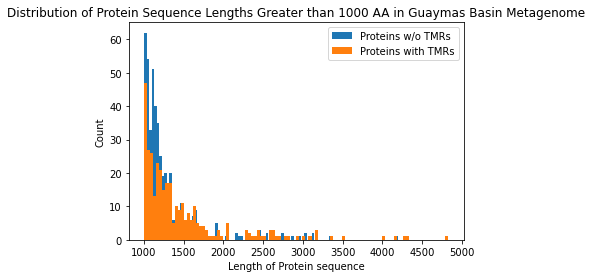

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.hist(bigasgardnotmrs['aa_length'], bins=100);
#plt.hist(bigasgards['aa_length'], bins=100);
plt.hist(bigasgardstmrs['aa_length'], bins=100);
plt.xlabel('Length of Protein sequence')
plt.ylabel('Count')
plt.title('Distribution of Protein Sequence Lengths Greater than 1000 AA in Guaymas Basin Metagenome')
plt.legend(['Proteins w/o TMRs', 'Proteins with TMRs'])

(50979, 7)


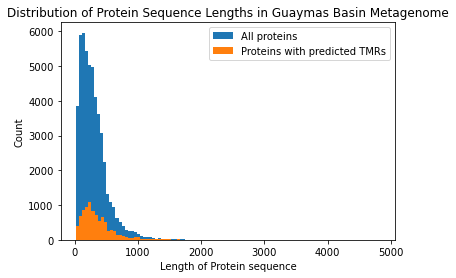

In [30]:
#Plot the distribution of aa_length in asgard_tmrs_annot

plt.hist(asgard_tmrs_annot['aa_length'], bins=100);
plt.hist(asgardswtmrs_annot['aa_length'], bins=100);
plt.xlabel('Length of Protein sequence')
plt.ylabel('Count')
plt.title('Distribution of Protein Sequence Lengths in Guaymas Basin Metagenome')
plt.legend(['All proteins', 'Proteins with predicted TMRs'])
print(asgard_tmrs_annot.shape)

In [33]:
#output the proteins with predicted TMRs to a fasta file
with open('/project/dbarth/asgard/membrane_proteome/Guaymas_D4994_C39_H1_Asgards_prots_TMRs.fasta', 'w') as f:
    for index, row in asgardswtmrs_annot.iterrows():
        f.write('>' + row['ProteinID'] + '\n' + row['aa_sequence'] + '\n') 
f.close() 
        

In [35]:
#Read in the orthogroup annotations
ortho_annots = pd.read_csv(annotation_filepath, delimiter='\t')
ortho_annots.head()

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
0,D4994_C39_H1_Bin_100_scaffold_100904_2,529709.PYCH_16170,8.380000e-134,397.0,"COG1474@1|root,arCOG00467@2157|Archaea,2XU73@2...",183968|Thermococci,L,Involved in regulation of DNA replication,cdc6,-,...,ko:K10725,-,-,-,-,"ko00000,ko03032",-,-,-,"AAA,AAA_16,Cdc6_C"
1,D4994_C39_H1_Bin_100_scaffold_100904_3,386456.JQKN01000018_gene597,1.470000e-101,320.0,"COG1311@1|root,arCOG04455@2157|Archaea,2XSUG@2...",183925|Methanobacteria,L,Possesses two activities a DNA synthesis (poly...,polB,-,...,ko:K02323,"ko00230,ko00240,ko01100,ko03030,map00230,map00...",M00264,"R00375,R00376,R00377,R00378",RC02795,"ko00000,ko00001,ko00002,ko01000,ko03032",-,-,-,DNA_pol_E_B
2,D4994_C39_H1_Bin_100_scaffold_100904_4,224325.AF_1722,1.830000e-308,898.0,"COG1933@1|root,arCOG04447@2157|Archaea,2XU5S@2...",183980|Archaeoglobi,L,Possesses two activities a DNA synthesis (poly...,polC,-,...,ko:K02322,"ko00230,ko00240,ko01100,ko03030,map00230,map00...",M00264,"R00375,R00376,R00377,R00378",RC02795,"ko00000,ko00001,ko00002,ko01000,ko03032",-,-,-,PolC_DP2
3,D4994_C39_H1_Bin_100_scaffold_100904_5,224325.AF_2325,4.510000e-12,63.9,"COG2412@1|root,arCOG04051@2157|Archaea,2XYQK@2...",183980|Archaeoglobi,S,Protein of unknown function (DUF424),-,-,...,ko:K09148,-,-,-,-,ko00000,-,-,-,DUF424
4,D4994_C39_H1_Bin_100_scaffold_100904_6,267377.MMP0297,3.700000e-39,135.0,"COG1601@1|root,arCOG01640@2157|Archaea,2XTVZ@2...",183939|Methanococci,J,eIF-2 functions in the early steps of protein ...,eif2b,-,...,ko:K03238,"ko03013,map03013",-,-,-,"ko00000,ko00001,ko01009,ko03012",-,-,-,eIF-5_eIF-2B


Now, need to merge everything together! 

In [36]:
#First we need to add a bin column to each protein!
ortho_annots['Bin'] = ortho_annots['#query'].str.split('_', 5).str[:5].str.join('_')
#ortho_annots.head()

In [16]:
mags_annots.columns

Index(['Genomes (Dive_Core_Horizon_Bin)', 'Sample (Dive_Core_Horizon)',
       'Taxonomy', 'CheckM Marker v1.1.3', 'CheckM Completeness v1.1.3',
       'CheckM Contamination v1.1.3', 'GTDB-Tk v1.5.1 Classification',
       'Value'],
      dtype='object')

In [38]:
#First put together the two annotations, joining on the Bin columns
annot_df = ortho_annots.merge(mags_annots, left_on='Bin', right_on='Genomes (Dive_Core_Horizon_Bin)', how='outer')
print(annot_df.shape, ortho_annots.shape)

(1355689, 30) (1355689, 22)


In [40]:
#Now it is time to merge asgard_tmrs with the annot_df
asgard_tmrs_annot = asgard_tmrs.merge(annot_df, left_on='ProteinID', right_on='#query', how='left')
print(asgard_tmrs.shape, asgard_tmrs_annot.shape)

(50979, 5) (50979, 35)


In [41]:
asgard_tmrs_annot.head(5)

,ProteinID,Num_predicted_TMRs,aa_sequence,DeepTMHMM_prediction,Bin_x,#query,seed_ortholog,evalue,score,eggNOG_OGs,...,PFAMs,Bin_y,Genomes (Dive_Core_Horizon_Bin),Sample (Dive_Core_Horizon),Taxonomy,CheckM Marker v1.1.3,CheckM Completeness v1.1.3,CheckM Contamination v1.1.3,GTDB-Tk v1.5.1 Classification,Value
0,D4994_C39_H1_Bin_33_scaffold_101747_1,1,MITRSRGNESRSFNRSTSPNSRSSSSSRSNLDSDSDSDSDSYSNDI...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D4994_C39_H1_Bin_33_scaffold_101747_2,0,MEEYLIHKGPVSCWDEKTKGEVIALMYHKIIVTVEWYKKNPTNEEF...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33_scaffold_101747_2,112098.XP_008618171.1,1.890000e-14,82.4,"2AVA3@1|root,2RZVU@2759|Eukaryota",...,DOT1,D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33,D4994_C39_H1,Lokiarchaeota,k__Archaea (UID2),92.52,6.25,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,1.0
2,D4994_C39_H1_Bin_33_scaffold_101747_3,0,MKPQFFIGNNVYAMIKAFTKNNKTQGVLTVVPNTVRPDKICSGRFM...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D4994_C39_H1_Bin_33_scaffold_102981_1,1,MKKNTFTVVTLSVLVLAVMIPMTFPGNDTRVEDQVAMQPDAPVTSY...,SSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOO...,D4994_C39_H1_Bin_33,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D4994_C39_H1_Bin_33_scaffold_102981_10,0,MVEEEREDREEEEGEEGEEEEEGDNLGELVDGGITEDNLANVTGDD...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33_scaffold_102981_10,565033.GACE_1479,4.490000e-30,119.0,"COG1386@1|root,arCOG02613@2157|Archaea,2XZ7Q@2...",...,SMC_ScpB,D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33,D4994_C39_H1,Lokiarchaeota,k__Archaea (UID2),92.52,6.25,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,1.0


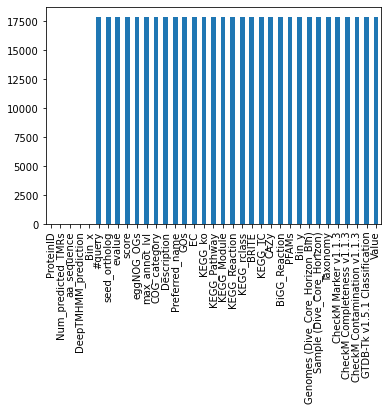

In [42]:
#How many columns have NaN values.. 
asgard_tmrs_annot.isnull().sum().plot.bar();
#!17,500 proteins of the original ~50,000 have no orthogroup annotation

In [44]:
#Make a new df with only the proteins that have predicted TMRs
asgardswtmrs_annot = asgard_tmrs_annot[asgard_tmrs_annot['Num_predicted_TMRs']>0]
asgardswtmrs_annot.shape

(9003, 35)

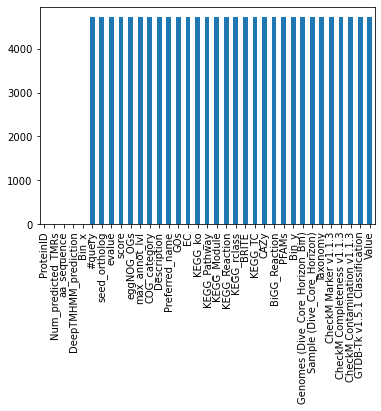

In [45]:

asgardswtmrs_annot.isnull().sum().plot.bar();

In [46]:
#Export the proteins with predicted TMRs to a tsv file
#asgardswtmrs_annot.to_csv('/project/dbarth/asgard/membrane_proteome/Guaymas_D4994_C39_H1_Asgardprots_with_TMRs_orthoannotated.tsv', sep='\t', index=False)

In [48]:
#Let's make the very rough assumption that if the protein isn't mapping to an orthogroup, then it likely 
# doesn't have a eukaryotic ortholog, so we can quick and dirty drop all of the null values and then do some EDA
# Circling back to look at the non-mapped ones after!
asg_memb_prot_orthos = asg_memb_proteome.dropna()
print(asg_memb_prot_orthos.shape, asg_memb_proteome.shape)

(4274, 34) (9003, 34)


In [38]:
#There are 1,670,068 proteins in the prokaryotic database predicted from the D4994_C39_H1 metagenome from Guaymas Bay.
#And there are 1,355,689 proteins that mapped to orthogroups, so ~320,000 proteins didn't map to orthogroups and 
#~20,000 of those that didn't map were Asgards... think that is a larger proportion than expected 
ortho_annots.shape

(1355689, 21)

In [47]:
print(f'Roughly {((1670068-1355689)/1670068)*100}% of the 1.67 million proteins did not map to orthogroups')
print(f'Of that percentage, {(20000/(1670068-1355689))*100}% were Asgard')

Roughly 18.82432332096657% of the 1.67 million proteins did not map to orthogroups
Of that percentage, 6.361748081137734% were Asgard


In [50]:
#So now we have 4274 proteins to look into that might have eukaryotic similarities
asg_memb_prot_orthos.columns

Index(['ProteinID', 'Num_predicted_TMRs', 'aa_sequence',
       'DeepTMHMM_prediction', 'Bin', 'Genomes (Dive_Core_Horizon_Bin)',
       'Sample (Dive_Core_Horizon)', 'Taxonomy', 'CheckM Marker v1.1.3',
       'CheckM Completeness v1.1.3', 'CheckM Contamination v1.1.3',
       'GTDB-Tk v1.5.1 Classification', 'Value', '#query', 'seed_ortholog',
       'evalue', 'score', 'eggNOG_OGs', 'max_annot_lvl', 'COG_category',
       'Description', 'Preferred_name', 'GOs', 'EC', 'KEGG_ko', 'KEGG_Pathway',
       'KEGG_Module', 'KEGG_Reaction', 'KEGG_rclass', 'BRITE', 'KEGG_TC',
       'CAZy', 'BiGG_Reaction', 'PFAMs'],
      dtype='object')

In [55]:
import seaborn as sns
#Let's look at the eggNOG_OGs and the PFAMs then maybe Description
#There's a few PFAMs that aggregate! Let's do a table for those and sort
#sns.catplot(data=asg_memb_prot_orthos, x="Taxonomy", hue='eggNOG_OGs',  kind="count", palette="ch:.25")


In [57]:
# define custom aggregation function, thank you ChatGPT!
def comma_combine(x):
    return ','.join(x)

In [86]:
#Want to aggregate all of the other columns under the same ID into one row 
groupedbyPFAMs = asg_memb_prot_orthos.groupby('PFAMs').agg(comma_combine).reset_index()
groupedbyOG = asg_memb_prot_orthos.groupby('eggNOG_OGs').agg(comma_combine).reset_index()

print(f"There are {groupedbyPFAMs.shape[0]} PFAMs, {groupedbyOG.shape[0]} eggNOG OGs.")
groupedbyPFAMs.head(5)

/stor/home/drb2955/miniconda3/envs/gleams/lib/python3.8/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


There are 780 PFAMs, 2409 eggNOG OGs.


,PFAMs,ProteinID,aa_sequence,DeepTMHMM_prediction,Bin,Genomes (Dive_Core_Horizon_Bin),Sample (Dive_Core_Horizon),Taxonomy,CheckM Marker v1.1.3,GTDB-Tk v1.5.1 Classification,...,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction
0,-,"D4994_C39_H1_Bin_33_scaffold_222269_12,D4994_C...",MVQEKFNNELWCDIYSGKFFKRSKSLKRWMIKAWRFLLSKVWLILL...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIMMMMM...,"D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33,D4994_...","D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33,D4994_...","D4994_C39_H1,D4994_C39_H1,D4994_C39_H1,D4994_C...","Lokiarchaeota,Lokiarchaeota,Lokiarchaeota,Loki...","k__Archaea (UID2),k__Archaea (UID2),k__Archaea...",d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,...,"-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...","-,-,-,-,ko:K07342,-,-,ko:K02599,-,-,-,-,-,-,-,...","-,-,-,-,ko03060,ko04141,ko04145,ko05110,map030...","-,-,-,-,M00401,-,-,M00682,-,-,-,-,-,-,-,-,-,-,...","-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...","-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...","-,-,-,-,ko00000,ko00001,ko00002,ko02044,-,-,ko...","-,-,-,-,3.A.5.7,3.A.5.8,3.A.5.9,-,-,-,-,-,-,-,...","-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...","-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,..."
1,2TM,"D4994_C39_H1_Bin_733_scaffold_112369_1,D4994_C...",TYCLSAQALFFINYVSNFTIKWFLWPVLLWPVALAIHGIIFYITLN...,IMMMMMMMMMMMMMMOOOOOOMMMMMMMMMMMMMMMMMMMMMMIII...,"D4994_C39_H1_Bin_733,D4994_C39_H1_Bin_733,D499...","D4994_C39_H1_Bin_733,D4994_C39_H1_Bin_733,D499...","D4994_C39_H1,D4994_C39_H1,D4994_C39_H1,D4994_C...","Lokiarchaeota,Lokiarchaeota,Lokiarchaeota,Loki...","k__Archaea (UID2),k__Archaea (UID2),k__Archaea...",d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,...,"-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-"
2,"2TM,Guanylate_cyc","D4994_C39_H1_Bin_371_scaffold_562269_24,D4994_...",MSYEGFSEESLKRIARRKVNFRMAVKIHTGCYIIVSAFLYTVNLLF...,IIIIIIIIIIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMOOOO...,"D4994_C39_H1_Bin_371,D4994_C39_H1_Bin_797","D4994_C39_H1_Bin_371,D4994_C39_H1_Bin_797","D4994_C39_H1,D4994_C39_H1","Lokiarchaeota,Lokiarchaeota","k__Archaea (UID2),k__Archaea (UID2)",d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,...,"4.6.1.1,4.6.1.1","ko:K01768,ko:K01768","ko00230,ko02025,ko04113,ko04213,map00230,map02...","M00695,M00695","R00089,R00434,R00089,R00434","RC00295,RC00295","ko00000,ko00001,ko00002,ko01000,ko00000,ko0000...","-,-","-,-","-,-"
3,"2TM,HATPase_c,His_kinase",D4994_C39_H1_Bin_33_scaffold_92929_16,MNNKKDDSGQKSPFSEEALKQIAKEKILWALGVKIHFAAFIGVNIM...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIMMMMMMMMMMMM...,D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33,D4994_C39_H1,Lokiarchaeota,k__Archaea (UID2),d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,...,2.7.13.3,"ko:K02478,ko:K08082","ko02020,map02020",M00493,-,-,"ko00000,ko00001,ko00002,ko01000,ko01001,ko02022",-,-,-
4,"4HB_MCP_1,HAMP,MCPsignal,sCache_2",D4994_C39_H1_Bin_37_scaffold_262178_5,MRKISRIIQKNSINRQKKEQNGTKIHEDIVEIKKQEIKRSKIILVF...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIMMMMM...,D4994_C39_H1_Bin_37,D4994_C39_H1_Bin_37,D4994_C39_H1,Lokiarchaeota,k__Archaea (UID2),d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,...,-,ko:K03406,"ko02020,ko02030,map02020,map02030",-,-,-,"ko00000,ko00001,ko02035",-,-,-


In [87]:
groupedbyOG.head()

,eggNOG_OGs,ProteinID,aa_sequence,DeepTMHMM_prediction,Bin,Genomes (Dive_Core_Horizon_Bin),Sample (Dive_Core_Horizon),Taxonomy,CheckM Marker v1.1.3,GTDB-Tk v1.5.1 Classification,...,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
0,"28H6X@1|root,2N56X@2157|Archaea,2Y45Q@28890|Eu...",D4994_C39_H1_Bin_674_scaffold_217533_33,MQDFLTLMVSLFQFFATYSNITLLLAGLSAGSWFFIRIFQGKREED...,OOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMIIIIIII...,D4994_C39_H1_Bin_674,D4994_C39_H1_Bin_674,D4994_C39_H1,Helarchaeota,k__Archaea (UID2),d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,...,-,-,-,-,-,-,-,-,-,-
1,"28HVA@1|root,2N5VN@2157|Archaea,2XXDX@28890|Eu...","D4994_C39_H1_Bin_33_scaffold_587977_22,D4994_C...",MLTSVFTRPKHWTLGIITLGALAILSVFGIWIQLIEKVVLESGYGV...,IIIIIIIIIIIIIMMMMMMMMMMMMMMMMMMMMMOOOOOOOOOOOO...,"D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_188","D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_188","D4994_C39_H1,D4994_C39_H1","Lokiarchaeota,Lokiarchaeota","k__Archaea (UID2),k__Archaea (UID2)",d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,...,"-,-","-,-","-,-","-,-","-,-","-,-","-,-","-,-","-,-","-,-"
2,"28IFV@1|root,2Z8HF@2|Bacteria,1G16A@1117|Cyano...",D4994_C39_H1_Bin_316_scaffold_528012_22,MTNDETENKQIKFLSSIKEIKIPWKEFLSPNLLFLILWIFFLLYSL...,IIIIIIIIIIIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMMMM...,D4994_C39_H1_Bin_316,D4994_C39_H1_Bin_316,D4994_C39_H1,Heimdallarchaeia,k__Archaea (UID2),d__Archaea;p__Asgardarchaeota;c__Heimdallarcha...,...,-,-,-,-,-,-,-,-,-,-
3,"28IGK@1|root,2Z8I1@2|Bacteria",D4994_C39_H1_Bin_33_scaffold_252066_10,MLLQSSMDFNAFIIIYIIAFVARIFAYVVVFSRIKPERGNVVGFYL...,OOOOOOOOOOOMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIMMMMM...,D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33,D4994_C39_H1,Lokiarchaeota,k__Archaea (UID2),d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,...,-,-,-,-,-,-,-,-,-,-
4,"28IGK@1|root,2Z8I1@2|Bacteria,1GCH8@1117|Cyano...",D4994_C39_H1_Bin_733_scaffold_399018_16,MNLMDYSPYILIYIFSLLIRYFVYLFIIRKGQNKDISPGLESIIIL...,OOOOOOOOOMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIMMMMMMM...,D4994_C39_H1_Bin_733,D4994_C39_H1_Bin_733,D4994_C39_H1,Lokiarchaeota,k__Archaea (UID2),d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,...,-,-,-,-,-,-,-,-,-,-


In [88]:
#Remove duplicates from the Taxonomy row
def de_duplicate(row):
    #print(row)
    return ','.join(set(row.split(',')))
groupedbyOG['Taxonomy'] = groupedbyOG['Taxonomy'].apply(de_duplicate)
#arTMR_full['Taxonomy'] = arTMR_full['Taxonomy'].apply(de_duplicate)

In [89]:
#Filter the eggNOG_OGs rows for any instance of Eukaryote
# Use boolean indexing with str.contains() to filter rows
possible_euks = groupedbyOG[groupedbyOG['eggNOG_OGs'].str.contains('Euk', case=False)]

possible_euks.head()

,eggNOG_OGs,ProteinID,aa_sequence,DeepTMHMM_prediction,Bin,Genomes (Dive_Core_Horizon_Bin),Sample (Dive_Core_Horizon),Taxonomy,CheckM Marker v1.1.3,GTDB-Tk v1.5.1 Classification,...,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
11,"28KE0@1|root,2QSUV@2759|Eukaryota,38F08@33154|...",D4994_C39_H1_Bin_261_scaffold_134540_39,MSQDSESEGKKKKGKINWYLDTPSKQTIVLVGSFVFLYVLCTMVLK...,IIIIIIIIIIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMMMMM...,D4994_C39_H1_Bin_261,D4994_C39_H1_Bin_261,D4994_C39_H1,Lokiarchaeota,k__Archaea (UID2),d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,...,ko:K12359,-,-,-,-,ko00000,-,-,-,CLN6
12,"28KE0@1|root,2QSUV@2759|Eukaryota,38F08@33154|...",D4994_C39_H1_Bin_33_scaffold_719467_14,MTRKKALSNPIVRTVIFTAVLASGYLFSYLPWKAMKADLQFSFYLS...,IIIIIIIIIIMMMMMMMMMMMMMMMMMOOOOOOOOOOOOOOOOOOO...,D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33,D4994_C39_H1,Lokiarchaeota,k__Archaea (UID2),d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,...,ko:K12359,-,-,-,-,ko00000,-,-,-,CLN6
13,"28KFP@1|root,2QSWV@2759|Eukaryota",D4994_C39_H1_Bin_33_scaffold_4411_3,MTIEPGILWGMTFGLIGSCTLNLGKSIQKQGIEVKGSKARKGGIWI...,OOOOOOOOMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIMMMM...,D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33,D4994_C39_H1,Lokiarchaeota,k__Archaea (UID2),d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,...,-,-,-,-,-,-,-,-,-,Mg_trans_NIPA
14,"28KFP@1|root,2QSWV@2759|Eukaryota,37RHV@33090|...",D4994_C39_H1_Bin_335_scaffold_127112_17,MSYTLGIILAITSGAVNNLGILFQKKVINDHVEDPEFLKSLIKNPT...,OOOOMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_335,D4994_C39_H1_Bin_335,D4994_C39_H1,Lokiarchaeota,k__Archaea (UID2),d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,...,-,-,-,-,-,-,-,-,-,Mg_trans_NIPA
15,"28KFP@1|root,2QSWV@2759|Eukaryota,37RHV@33090|...",D4994_C39_H1_Bin_33_scaffold_394504_5,MLIIAIIIQIIGVTILNLSMILQKKGADEIPNVHDVPFMQSVKNFL...,OOMMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIII...,D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33,D4994_C39_H1,Lokiarchaeota,k__Archaea (UID2),d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...,...,-,-,-,-,-,-,-,-,-,Mg_trans_NIPA


In [90]:
possible_euks.shape

(146, 28)

In [93]:
#Let's group the possible euks by PFAMs real quick!
#First de-duplicate the PFAMs column: 
possible_euks['PFAMs'] = possible_euks['PFAMs'].apply(de_duplicate)
PFAMs_possible_euks = possible_euks.groupby('PFAMs').agg(comma_combine).reset_index()
PFAMs_possible_euks['Taxonomy'] = PFAMs_possible_euks['Taxonomy'].apply(de_duplicate)
PFAMs_possible_euks.head()

<ipython-input-93-c0ccc646f832>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  possible_euks['PFAMs'] = possible_euks['PFAMs'].apply(de_duplicate)


,PFAMs,eggNOG_OGs,ProteinID,aa_sequence,DeepTMHMM_prediction,Bin,Genomes (Dive_Core_Horizon_Bin),Sample (Dive_Core_Horizon),Taxonomy,CheckM Marker v1.1.3,...,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction
0,-,"28P40@1|root,2QVQN@2759|Eukaryota,297V5@1|root...","D4994_C39_H1_Bin_261_scaffold_706692_1,D4994_C...",MIHMEQSKKILDIFNLEVILFSILILFFLQMITELISSIYMLDLLN...,IIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMMMOOOOOOOOOO...,"D4994_C39_H1_Bin_261,D4994_C39_H1_Bin_33,D4994...","D4994_C39_H1_Bin_261,D4994_C39_H1_Bin_33,D4994...","D4994_C39_H1,D4994_C39_H1,D4994_C39_H1,D4994_C...","Heimdallarchaeia,Helarchaeota,Lokiarchaeota","k__Archaea (UID2),k__Archaea (UID2),k__Archaea...",...,"-,-,-,-,-,-,-,-,-,-,2.7.1.182,2.7.1.216,2.7.1....","-,-,-,-,-,-,-,-,-,-,ko:K15892,ko:K18678,ko:K15...","-,-,-,-,-,-,-,-,-,-,ko00900,ko01130,map00900,m...","-,-,-,-,-,-,-,-,-,-,-,-,-,M00682","-,-,-,-,-,-,-,-,-,-,R09849,R10659,R09849,R1065...","-,-,-,-,-,-,-,-,-,-,RC00002,RC00017,RC00002,RC...","-,-,-,-,-,-,-,-,-,-,ko00000,ko00001,ko01000,ko...","-,-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-,-"
1,"-,PHP","2CXR7@1|root,2RZ71@2759|Eukaryota,3A1VM@33154|...","D4994_C39_H1_Bin_33_scaffold_583631_2,D4994_C3...",MIATSTISVVIWQVGWLGFVGRFLSYTGFIMTGIAASVITSVLGPP...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,"D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33,D4994_...","D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33,D4994_...","D4994_C39_H1,D4994_C39_H1,D4994_C39_H1,D4994_C...","Heimdallarchaeia,Lokiarchaeota","k__Archaea (UID2),k__Archaea (UID2),k__Archaea...",...,"-,-,-,-,-,-,-","-,-,-,-,-,-,-","-,-,-,-,-,-,-","-,-,-,-,-,-,-","-,-,-,-,-,-,-","-,-,-,-,-,-,-","-,-,-,-,-,-,-","-,-,-,-,-,-,-","-,-,-,-,-,-,-","-,-,-,-,-,-,-"
2,"ABC_tran,EGF_2,ABC2_membrane","COG1131@1|root,KOG0061@2759|Eukaryota",D4994_C39_H1_Bin_33_scaffold_408093_25,MFGAVFFPLVVLLMFKTLVLVVDCSGDDVLGYLHCANEGTLEGNDS...,SSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOO...,D4994_C39_H1_Bin_33,D4994_C39_H1_Bin_33,D4994_C39_H1,Lokiarchaeota,k__Archaea (UID2),...,-,ko:K05681,"ko01523,ko02010,ko04976,map01523,map02010,map0...",-,-,-,"ko00000,ko00001,ko02000,ko04090,ko04147",3.A.1.204,-,-
3,ABC_transp_aux,"KOG3861@1|root,KOG3861@2759|Eukaryota,38CN2@33...","D4994_C39_H1_Bin_316_scaffold_526974_27,D4994_...",MRTHRVKGLIFLSTIILGFVFTSFFGASMSFTGPNTAQQLDSTPTD...,SSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,"D4994_C39_H1_Bin_316,D4994_C39_H1_Bin_674","D4994_C39_H1_Bin_316,D4994_C39_H1_Bin_674","D4994_C39_H1,D4994_C39_H1","Heimdallarchaeia,Helarchaeota","k__Archaea (UID2),k__Archaea (UID2)",...,"-,-","ko:K19681,ko:K19681","-,-","-,-","-,-","-,-","ko00000,ko03036,ko00000,ko03036","-,-","-,-","-,-"
4,"AMP-binding,Hexapep,Catalase,NAD_binding_8,Ami...","COG0318@1|root,KOG3628@2759|Eukaryota,37IHD@33...","D4994_C39_H1_Bin_188_scaffold_214728_6,D4994_C...",MPDESVPNQPSKADLPDLPNLPNQSSHSNQSMTSIDFGEDDGRKNS...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,"D4994_C39_H1_Bin_188,D4994_C39_H1_Bin_371","D4994_C39_H1_Bin_188,D4994_C39_H1_Bin_371","D4994_C39_H1,D4994_C39_H1",Lokiarchaeota,"k__Archaea (UID2),k__Archaea (UID2)",...,"-,-","-,-","-,-","-,-","-,-","-,-","-,-","-,-","-,-","-,-"


In [94]:
# Use str.count() to count the commas and add 1
PFAMs_possible_euks['count'] = PFAMs_possible_euks['ProteinID'].str.count(',') + 1

In [97]:
PFAMs_possible_euks.sort_values('count', ascending=False).head(20)
#STT3 is a Yeastie beastie!! MFS_1 looks like a major transporter family, zf-RING_2 domain (originally thought to be only euks, could be interesting to look at the structure of this one and see if it looks more prok or euk!)
#Presenilin for sure!! Top hit is for Alzheimer's signal peptides!! 4 Loki proteins
#Mg_trans_NIPA magnesium transporter euk and prok
#Ribophorin_I looks like associated with rough endoplasmic reticulum!Heimdall and loki!
#ALSO OST3_OST6 is also involved with the ER!! In Loki
#ICMT is also almost solely eukaryotic, that's in Thor and Loki!
#Prenyltrans could be involved in lipid synthesis...! Squalene cyclase! Enzyme class in Hela and Loki! 



,PFAMs,eggNOG_OGs,ProteinID,aa_sequence,DeepTMHMM_prediction,Bin,Genomes (Dive_Core_Horizon_Bin),Sample (Dive_Core_Horizon),Taxonomy,CheckM Marker v1.1.3,...,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,count
25,FtsX,"2BZJY@1|root,2QPZ9@2759|Eukaryota,2BZJY@1|root...","D4994_C39_H1_Bin_319_scaffold_320404_1,D4994_C...",MFAISGVLISIFLLTSVSILNDSLSYSYVNMATNQAGASDIVFTRS...,IMMMMMMMMMMMMMMMMMMMOOOOOOOOOOOOOOOOOOOOOOOOOO...,"D4994_C39_H1_Bin_319,D4994_C39_H1_Bin_319,D499...","D4994_C39_H1_Bin_319,D4994_C39_H1_Bin_319,D499...","D4994_C39_H1,D4994_C39_H1,D4994_C39_H1,D4994_C...",Lokiarchaeota,"k__Archaea (UID2),k__Archaea (UID2),k__Archaea...",...,"-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-",20
61,STT3,"COG1287@1|root,KOG2292@2759|Eukaryota,37M0F@33...","D4994_C39_H1_Bin_733_scaffold_650469_21,D4994_...",MVKLSTRIKRFFQESVEKTKASIKISRQNILVTISLMLIFFCAIWI...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMM...,"D4994_C39_H1_Bin_733,D4994_C39_H1_Bin_335,D499...","D4994_C39_H1_Bin_733,D4994_C39_H1_Bin_335,D499...","D4994_C39_H1,D4994_C39_H1,D4994_C39_H1,D4994_C...","Thorarchaeota,Helarchaeota,Lokiarchaeota,Idunn...","k__Archaea (UID2),k__Archaea (UID2),k__Archaea...",...,"ko:K07151,ko:K07151,ko:K07151,ko:K07151,ko:K07...","ko00510,ko00513,ko01100,ko04141,map00510,map00...","M00072,M00072,M00072,M00072,M00072,M00072,M000...","R04216,R05976,R04216,R05976,R04216,R05976,R042...","RC00005,RC00482,RC00005,RC00482,RC00005,RC0048...","ko00000,ko00001,ko00002,ko01000,ko01003,ko0000...","-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-","GT66,GT66,GT66,GT66,GT66,GT66,GT66,GT66,GT66,G...","-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-",16
0,-,"28P40@1|root,2QVQN@2759|Eukaryota,297V5@1|root...","D4994_C39_H1_Bin_261_scaffold_706692_1,D4994_C...",MIHMEQSKKILDIFNLEVILFSILILFFLQMITELISSIYMLDLLN...,IIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMMMOOOOOOOOOO...,"D4994_C39_H1_Bin_261,D4994_C39_H1_Bin_33,D4994...","D4994_C39_H1_Bin_261,D4994_C39_H1_Bin_33,D4994...","D4994_C39_H1,D4994_C39_H1,D4994_C39_H1,D4994_C...","Heimdallarchaeia,Helarchaeota,Lokiarchaeota","k__Archaea (UID2),k__Archaea (UID2),k__Archaea...",...,"-,-,-,-,-,-,-,-,-,-,ko:K15892,ko:K18678,ko:K15...","-,-,-,-,-,-,-,-,-,-,ko00900,ko01130,map00900,m...","-,-,-,-,-,-,-,-,-,-,-,-,-,M00682","-,-,-,-,-,-,-,-,-,-,R09849,R10659,R09849,R1065...","-,-,-,-,-,-,-,-,-,-,RC00002,RC00017,RC00002,RC...","-,-,-,-,-,-,-,-,-,-,ko00000,ko00001,ko01000,ko...","-,-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-,-",14
64,"SecY,Plug_translocon","COG0201@1|root,KOG1373@2759|Eukaryota,COG0201@...","D4994_C39_H1_Bin_371_scaffold_164777_14,D4994_...",MTGKFLKFFTPGVKILPEIKQPQREVAFKEKFIWTAVVLVIYIILS...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMM...,"D4994_C39_H1_Bin_371,D4994_C39_H1_Bin_316,D499...","D4994_C39_H1_Bin_371,D4994_C39_H1_Bin_316,D499...","D4994_C39_H1,D4994_C39_H1,D4994_C39_H1,D4994_C...","Thorarchaeota,Helarchaeota,Lokiarchaeota,Idunn...","k__Archaea (UID2),k__Archaea (UID2),k__Archaea...",...,"ko:K10956,ko:K10956,ko:K10956,-,ko:K10956,ko:K...","ko03060,ko04141,ko04145,ko05110,map03060,map04...","M00401,M00401,M00401,-,M00401,M00401,M00401,M0...","-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-","ko00000,ko00001,ko00002,ko02044,ko00000,ko0000...","3.A.5.4,3.A.5.8,3.A.5.9,3.A.5.4,3.A.5.8,3.A.5....","-,-,-,-,-,-,-,-,-,-,-,-,-","-,-,-,-,-,-,-,-,-,-,-,-,-",13
26,GDPD,"COG0584@1|root,KOG2258@2759|Eukaryota,38H8E@33...","D4994_C39_H1_Bin_335_scaffold_16736_15,D4994_C...",MEEAIIVLIEKLKNKKGKKWIILYLACMINFGVFLLFLYILRPYWG...,IIIIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMMMMMMOOOOO...,"D4994_C39_H1_Bin_335,D4994_C39_H1_Bin_188,D499...","D4994_C39_H1_Bin_335,D4994

In [169]:
pres = PFAMs_possible_euks[PFAMs_possible_euks['PFAMs']=='Presenilin']['ProteinID'].to_numpy()
pres

array(['D4994_C39_H1_Bin_371_scaffold_611722_14,D4994_C39_H1_Bin_797_scaffold_555243_9,D4994_C39_H1_Bin_261_scaffold_670907_18,D4994_C39_H1_Bin_335_scaffold_379244_18'],
      dtype=object)

In [170]:
pres_bins = pres[0].split(',')
for i in pres_bins:
    print(i)
    print(dtm_df[dtm_df['ProteinID']==str(i)]['aa_sequence'].to_numpy())

D4994_C39_H1_Bin_371_scaffold_611722_14
['MSEDAEKLENHDQNNTKIIQNSKEVVKKDLVPHFLPTYRISFKHFPIPILIVIVIAGLLAYATYFGAGVQVDGGYFPEEDLGVIAGILNGIIFTFTTVCAAFLIVFLIKKKGIDVLKYIFGFSFGLLGFTLSWFFASVIIFLLFIQFPETPALVINYHIVSDIISPILVAIFTALLLYKYFTSKSINTKNLIVMYISLLISASMGLMMPLWTTLAILIGISLWDIYAVLNKKGPIKEMIDIASKNDKYDLHDKEIEVSIKKGESIYDTSKIEIGIGDLAFYSMLTTSALIQSGNVLIMIFTTIAILIGTGITLNGLKRNKILPGLPISIFLGIATMFLSWYITSLL']
D4994_C39_H1_Bin_797_scaffold_555243_9
['MSVNKRKSRENNIKLVEKDFVPHFLPTFRIPTKFFPIPIIIVVIFSGFLAYITYFGAGIQMEGGYFSEADLGVIGGILNGILFTFTAAISAFLIIFFVKRKGIDILKYFFGFTIGFISFFMTYFFGSTIIYLIFIQFPETPELVNSYYLITNMILPILTGIFSVILLYKYFTSKSINLKNLIVLYTSLLMSASLAIFMPLWTTIAILIGLSIWDMFAVLSRRGPIREMIEIASKPDKDQNFVHANPSKKFVDIMYFYQPSLKYHQQASLNDEVIEKPVLVYDTSKIEIGIGDLIFYSMLTSCALIQSNSIIVVIFTLIAILIGIRLTIIGLKKNKILPGLPISIFLGIATMFISWFLLLIIFP']
D4994_C39_H1_Bin_261_scaffold_670907_18
['MVENSKNFQVQDSSFKDICENCGAELHGENICGQCGLKVKNKHFKKKKKKENDNSDSSYGPLTFNEVLGTFRIKLTRLYIPLLICIISATFLSWLTYYQAKVQINVAPFPDESNVGEIILNGIIPVLISALFIVIIYFIVKKFGLIVFKIIMGVLVLFYC

In [166]:
mfs1 = PFAMs_possible_euks[PFAMs_possible_euks['PFAMs']=='MFS_1']['ProteinID'].to_numpy()
mfs1

array(['D4994_C39_H1_Bin_188_scaffold_621793_2,D4994_C39_H1_Bin_316_scaffold_348358_25,D4994_C39_H1_Bin_316_scaffold_396429_5,D4994_C39_H1_Bin_674_scaffold_374933_3,D4994_C39_H1_Bin_797_scaffold_234158_1,D4994_C39_H1_Bin_122_scaffold_46537_2,D4994_C39_H1_Bin_733_scaffold_130622_10'],
      dtype=object)

In [168]:
mfs1_bins = mfs1[0].split(',')
for i in mfs1_bins:
    print(i)
    print(dtm_df[dtm_df['ProteinID']==str(i)]['aa_sequence'].to_numpy())

D4994_C39_H1_Bin_188_scaffold_621793_2
['MIAMTTESINITEIEAQSTSMKNIFLWSSYDAADTLFSQSIISIVFQPLILLVAFEQNIGSYSEAFLYMSLFMAFSNLLVALIGPMIGALSDVMGKRKPAVIISASLMMLATLGFLAYRDFWWLSICFVVANFAYQSGRMFYDSMIPFLAKADKRGFASAISGSLSFIGTFAGIGLAMVAWSQWGDYSEVATVYDGSAALDYGGLFGLTVITVIVIFLFAVPFLFSKEKETSKSENFLTTLKITRKEFWNTLKNLKNDKNAVLFFIAWFFVTDASNTTILYMQLVIVDGAGATPGQALIVVAMGGLLAMVGAIIVGKNLDKVGPKKNFIVNIIAWGISIVVAIVACIEIGGVDIAPWWIMIAVGFTIGIGFGGIWLIGRQFIYEIAPPNKIASYMGFKQIAGRVSAIASPLIFSAMMALGFALNLSTANAYSLALFPLILFFMIGMIIILRYKDVHKRYISGERAPYANL']
D4994_C39_H1_Bin_316_scaffold_348358_25
['MEPVQDVTEIEAKKTSMKNVFLWSSYDAADTLFSQAILSIAFQPYILILAYQMGVTDYGTAFMMMSIFMAVSNLLAASLGPILGALSDTIGKRKPAVLMSASLMITATLAFMAWSNYWWAIVCFVFANVGYQSGRLFFDSMIPFISKTDERGKTSGISGALSFIGTFVAIGLGMLAWNLWGEYLEPNILFAGNSTVENPFGGLVWLFGLTAGAIVLFSIPFLFSKEREGVNKNNFKTNFRISLKSLKSTLKEIVRYKNAWLFVLGWFLVTDAANTAILYMQLVIVDGAGATPTEALMVIAMGGLLSMVGAIVVGFLLDKFGPKKNFLINIIAWFIAVTLVILTVVEFNGQRILPWQVMFGGAFFVGLGFGGLWTIGRQFVFEIAPPNKVTQYQGIKQIAGRVSAILSPLLFLAIFGAAGNWGLSISNRYALALLPLLILFIIGF

In [131]:
STT3_prots = PFAMs_possible_euks[PFAMs_possible_euks['PFAMs']=='STT3']['ProteinID'].to_numpy()

In [132]:
STT3_prots

array(['D4994_C39_H1_Bin_733_scaffold_650469_21,D4994_C39_H1_Bin_335_scaffold_547411_22,D4994_C39_H1_Bin_261_scaffold_290071_1,D4994_C39_H1_Bin_122_scaffold_389354_13,D4994_C39_H1_Bin_797_scaffold_406584_7,D4994_C39_H1_Bin_33_scaffold_102981_15,D4994_C39_H1_Bin_674_scaffold_621366_21,D4994_C39_H1_Bin_188_scaffold_636289_2,D4994_C39_H1_Bin_316_scaffold_274279_31,D4994_C39_H1_Bin_803_scaffold_572567_2,D4994_C39_H1_Bin_371_scaffold_683326_12,D4994_C39_H1_Bin_37_scaffold_698381_13,D4994_C39_H1_Bin_629_scaffold_206863_8,D4994_C39_H1_Bin_225_scaffold_86641_29,D4994_C39_H1_Bin_436_scaffold_544557_32,D4994_C39_H1_Bin_319_scaffold_449784_66'],
      dtype=object)

In [135]:
stt3_bins = STT3_prots[0].split(',')
stt3_bins

['D4994_C39_H1_Bin_733_scaffold_650469_21',
 'D4994_C39_H1_Bin_335_scaffold_547411_22',
 'D4994_C39_H1_Bin_261_scaffold_290071_1',
 'D4994_C39_H1_Bin_122_scaffold_389354_13',
 'D4994_C39_H1_Bin_797_scaffold_406584_7',
 'D4994_C39_H1_Bin_33_scaffold_102981_15',
 'D4994_C39_H1_Bin_674_scaffold_621366_21',
 'D4994_C39_H1_Bin_188_scaffold_636289_2',
 'D4994_C39_H1_Bin_316_scaffold_274279_31',
 'D4994_C39_H1_Bin_803_scaffold_572567_2',
 'D4994_C39_H1_Bin_371_scaffold_683326_12',
 'D4994_C39_H1_Bin_37_scaffold_698381_13',
 'D4994_C39_H1_Bin_629_scaffold_206863_8',
 'D4994_C39_H1_Bin_225_scaffold_86641_29',
 'D4994_C39_H1_Bin_436_scaffold_544557_32',
 'D4994_C39_H1_Bin_319_scaffold_449784_66']

In [137]:
for i in stt3_bins:
    print(i)
    print(dtm_df[dtm_df['ProteinID']==str(i)]['aa_sequence'].to_numpy())

D4994_C39_H1_Bin_733_scaffold_650469_21
['MVKLSTRIKRFFQESVEKTKASIKISRQNILVTISLMLIFFCAIWIRLSPVFNDNFLIKAFDPWVQYKCTLYIVDNGIWDFLHWVDYQSWYPDGNPLYEMYIGLPLTNAIFYWILTGLGINVTVYQVCFYSPAFMGGLTCVVMYFLGKEVLDKKTGLLAAFFLAFSPGYMQRTVAGFYDNETIGVFATLLAILFFIRSIKKGSIYDGILAGFAAGYLSLSWGGYTYTFLLIPLFTILLILFRKYSNRLLLAYSSMMGMALLVHSFFRRISISEFFSDTSLVVPLLVLILLPLIELIYRMKSDKPGWYRNFWKLIKYLIVPGFVIAGVVIYVFRDHLVNLSSRMQTILNPLFRESVALVASVGEHMPSPWSVFYYNTFIPLIFVIPGIYFAFRRGSETDIILIIFTLTLYYFTGSMIRIILIFAPAAALMGSYGISQILKSFAMLGQKQKIIARRKEKLERKKIERSVGIVIFIFFGFLLTEQVYHASEISATQMPYSEIVSGGQFHDWEEAFTWMRTNLSPGTVVVSWWDYGYWMTVAGNVTTVNDNATRNHTRIGLTGMAMMMNDELESARALKELGADYVLVYFGHLLSGLGGDEGKWPWMVKICNDYSEQYANKSRFPSLHPEKWAVPYKKVFDYSKYINESNGLYDTQWFGSQLVRMMFYEEPLTIGEAKTSLQYWTAREISGDGKDYQPREDTHGKKWLDYFQDPRYFDFKVFRKAFFSSNTTVKIYKVDYTAIESDFEIINATLYNNGFGNVEINNTGLHALNATTIKFKGGTITYNLSSYEGTLEVQPGETKKFWFNTGRTNLRVGDYRAFVVSADVAAIGKIYSFDKESKDYEIKNSSVLSIHIDRNRTKGIIPDTVQVCVQNTGSESVRLKSITVGDISYNESQITPLNQTFVVPLNSSRTFNVALNTSQSNYTVGDYIPINVTMLENVWDSTMVTFNGGNSSIAFTGD

In [118]:
dtm_df[dtm_df['ProteinID']=='D4994_C39_H1_Bin_733_scaffold_650469_21']

,ProteinID,aa_sequence,DeepTMHMM_prediction
8695,D4994_C39_H1_Bin_733_scaffold_650469_21,MVKLSTRIKRFFQESVEKTKASIKISRQNILVTISLMLIFFCAIWI...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIMMMMMMMMMMMMMMMMM...


In [119]:
dtm_df[dtm_df['ProteinID']=='D4994_C39_H1_Bin_733_scaffold_650469_21']['aa_sequence']

8695    MVKLSTRIKRFFQESVEKTKASIKISRQNILVTISLMLIFFCAIWI...
Name: aa_sequence, dtype: object

/stor/home/drb2955/miniconda3/envs/gleams/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


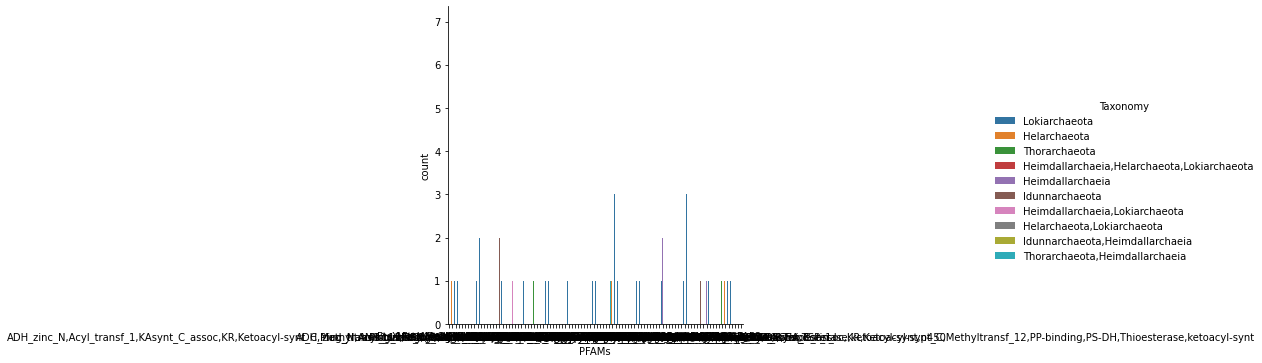

In [72]:
sns.catplot(data=possible_euks, x="PFAMs", hue='Taxonomy',  kind="count")#, palette="ch:.25")

#### Future inquiry to follow up on: 
1. Is it normal for so many proteins to not map to orthogroups?
    a. Investigate this by joining the full predicted proteome to the mapped and seeing how many columns are null/what percentage corresponds to Asgard versus the others. 